# 论文名：
Qubit-ADAPT-VQE: An Adaptive Algorithm for Constructing Hardware-Efficient Ansätze on a Quantum Processor

## 项目介绍

使用Adapt-VQE的方法来计算H4分子与LiH分子体系的基态能量

In [ ]:
## 安装最新版Minduantum，同时也需要安装pyscf量化计算软件包、openfermion 以及 openfermionpyscf
## h5py的版本如果太新，程序可能会报错，需要将h5py的版本调低一些

# pip install https://hiq.huaweicloud.com/download/mindquantum/newest/linux/mindquantum-master-cp37-cp37m-linux_x86_64.whl -i https://pypi.tuna.tsinghua.edu.cn/simple
# pip install openfermionpyscf
# pip install h5py==2.10.0 --force-reinstall

## 复现过程

请调用您的代码，按照步骤对论文进行复现，并输出复现结果。

In [15]:
## 使用VQE量子算法，首先需要用Hartree-Fock方法计算出相应的分子轨道，同时计算FCI的结果，便于之后比较VQE与FCI间的误差，并将所有的计算结果保存下来
from src.pyscf_cal_save import generate_H4, generate_LiH

In [16]:
## 使用Hartree-Fock方法计算H4分子体系
generate_H4()

0.5000 :	 -1.6531169519401159
0.6000 :	 -1.9601936448939203
0.7000 :	 -2.1069969150952832
0.8000 :	 -2.1675605441340453
0.9000 :	 -2.1803166143238610
1.0000 :	 -2.1663874486347598
1.1000 :	 -2.1379705268436227
1.2000 :	 -2.1026084809554191
1.3000 :	 -2.0652289632712861
1.4000 :	 -2.0290704935919619
1.5000 :	 -1.9961503255188096
1.6000 :	 -1.9675603099203722
1.7000 :	 -1.9436920386881200
1.8000 :	 -1.9244306381367224
1.9000 :	 -1.9093320600426347
2.0000 :	 -1.8977806459898745
2.1000 :	 -1.8891148747139386
2.2000 :	 -1.8827126374318441
2.3000 :	 -1.8780370449649078
2.4000 :	 -1.8746515824858949


In [17]:
## 使用Hartree-Fock方法计算LiH分子体系
generate_LiH()

1.0000 :	 -7.7844602800312339
1.1000 :	 -7.8255369578024592
1.2000 :	 -7.8524308531959148
1.3000 :	 -7.8691399763520291
1.4000 :	 -7.8784536522771536
1.5000 :	 -7.8823622867987071
1.6000 :	 -7.8823243788834958
1.7000 :	 -7.8794335165642657
1.8000 :	 -7.8745240249913167
1.9000 :	 -7.8682407938537997
2.0000 :	 -7.8610877724814960
2.1000 :	 -7.8534629050566025
2.2000 :	 -7.8456836231971891
2.3000 :	 -7.8380050026292460
2.4000 :	 -7.8306316244241110
2.5000 :	 -7.8237238834677028
2.6000 :	 -7.8173999274494488
2.7000 :	 -7.8117353391248177
2.8000 :	 -7.8067634025649637
2.9000 :	 -7.8024784528429860


In [18]:
## src文件夹中的fermionic.py文件编写了基于fermionic算符的Adapt-VQE方法，qubit.py文件编写了基于qubit算符的Adapt-VQE方法
## fermionic.py文件中又有fermionic_adapt_vqe_a与fermionic_adapt_vqe_b函数，两者都是基于fermionic算符的Adapt-VQE方法，区别在于
## 在Adapt-VQE方法中，每一次迭代，都会在原有的量子线路上根据梯度计算结果加上一组量子逻辑门，并从新优化所有的线路参数
## 有两种方式来实施线路参数初始化，一种是原有的线路的初始参数直接来自于上一步迭代的优化结果，新加入的线路的参数做随机初始化的处理(fermionic_adapt_vqe_a，qubit_adapt_vqe_a)
## 另一种方式是将所有的参数都做随机初始化的处理(fermionic_adapt_vqe_b, qubit_adapt_vqe_b)

from src.fermionic import fermionic_adapt_vqe_a, fermionic_adapt_vqe_b
from src.qubit import qubit_adapt_vqe_a, qubit_adapt_vqe_b
from openfermion.chem import MolecularData

In [19]:
dist = 1.0
geometry = [
    ["H", [0.0, 0.0, 0.0]],
    ["H", [dist, 0.0, 0.0]],
    ["H", [dist * 2.0, 0.0, 0.0]],
    ["H", [dist * 3.0, 0.0, 0.0]],
]
basis = "sto3g"
spin = 0
multiplicity = 2 * spin + 1
description = '{:.3f}'.format(dist)
H4_molecule = MolecularData(geometry, basis, multiplicity, description=description)

In [20]:
## 使用基于fermionic算符的Adapt-VQE方法计算H4分子体系的基态能，每一次的迭代过程中，原有的线路的初始参数来自于上一步的优化结果，新加入的线路的参数做随机初始化的处理
H4_f_res_a = fermionic_adapt_vqe_a(H4_molecule)

hf:-2.09854593699776.
ccsd:-2.166379521666025.
fci:-2.16638744863476.
Step   0 energy  -2.1224998698357864
Step   1 energy  -2.1330713343600438
Step   2 energy  -2.1441832987968130
Step   3 energy  -2.1510972180950723
Step   4 energy  -2.1555370251484018
Step   5 energy  -2.1586495363668003
Step   6 energy  -2.1610687919447602
Step   7 energy  -2.1639187250598639
Step   8 energy  -2.1649684324797831
Step   9 energy  -2.1662110751481629
Step  10 energy  -2.1662292144345368
Step  11 energy  -2.1662678688272585
Step  12 energy  -2.1662803628126275
Step  13 energy  -2.1663021762401451
Step  14 energy  -2.1663829706613495
Step  15 energy  -2.1663831172655934
Step  16 energy  -2.1663840626897057
Step  17 energy  -2.1663840627581221
Iterative is convergence!
Final energy :  -2.1663840627581221
Final error :   0.0000033858766377


In [21]:
## 使用基于fermionic算符的Adapt-VQE方法计算H4分子体系的基态能，每一次的迭代过程中，所有的参数都做随机初始化的处理
H4_f_res_b = fermionic_adapt_vqe_b(H4_molecule)

hf:-2.09854593699776.
ccsd:-2.166379521666025.
fci:-2.16638744863476.
Step   0 energy  -2.1224998698357784
Step   1 energy  -2.1330713343600345
Step   2 energy  -2.1441832987967970
Step   3 energy  -2.1510972180953201
Step   4 energy  -2.1555370251482389
Step   5 energy  -2.1586495363670868
Step   6 energy  -2.1610687919447265
Step   7 energy  -2.1639187250602050
Step   8 energy  -2.1649684324798018
Step   9 energy  -2.1662110751481509
Step  10 energy  -2.1662292144342854
Step  11 energy  -2.1639103995311655
Step  12 energy  -2.1663192752190565
Step  13 energy  -2.1663387796431177
Step  14 energy  -2.1639420577744648
Step  15 energy  -2.1663405878174475
Step  16 energy  -2.1663151638266065
Step  17 energy  -2.1663843194835999
Step  18 energy  -2.1663760010472433
Step  19 energy  -2.1663874486330572
Step  20 energy  -2.1663874486340720
Iterative is convergence!
Final energy :  -2.1663874486340720
Final error :   0.0000000000006879


In [22]:
## 使用基于qubit算符的Adapt-VQE方法计算H4分子体系的基态能，每一次的迭代过程中，原有的线路的初始参数来自于上一步的优化结果，新加入的线路的参数做随机初始化的处理
H4_q_res_a = qubit_adapt_vqe_a(H4_molecule)

hf:-2.09854593699776.
ccsd:-2.166379521666025.
fci:-2.16638744863476.
Step   0 energy  -2.1224998698357838
Step   1 energy  -2.1330713343598586
Step   2 energy  -2.1441832987968050
Step   3 energy  -2.1510972180953019
Step   4 energy  -2.1555370251483543
Step   5 energy  -2.1586495363670890
Step   6 energy  -2.1610687919447327
Step   7 energy  -2.1639187250602601
Step   8 energy  -2.1649684324796326
Step   9 energy  -2.1662110751484165
Step  10 energy  -2.1662378463563123
Step  11 energy  -2.1662705817540155
Step  12 energy  -2.1662891590043043
Step  13 energy  -2.1663133988729220
Step  14 energy  -2.1663133988731440
Iterative is convergence!
Final energy :  -2.1663133988731440
Final error :   0.0000740497616158


In [23]:
## 使用基于qubit算符的Adapt-VQE方法计算H4分子体系的基态能，每一次的迭代过程中，所有的参数都做随机初始化的处理
H4_q_res_b = qubit_adapt_vqe_b(H4_molecule)

hf:-2.09854593699776.
ccsd:-2.166379521666025.
fci:-2.16638744863476.
Step   0 energy  -2.1224998698357846
Step   1 energy  -2.1330713343600496
Step   2 energy  -2.1441832987968112
Step   3 energy  -2.1510972180952561
Step   4 energy  -2.1555370251484027
Step   5 energy  -2.1586495363670894
Step   6 energy  -2.1610687919447478
Step   7 energy  -2.1639187250602561
Step   8 energy  -2.1649684324795526
Step   9 energy  -2.1662110751481514
Step  10 energy  -2.1662378463564069
Step  11 energy  -2.1662705817542438
Step  12 energy  -2.1662891590039930
Step  13 energy  -2.1639365628950120
Step  14 energy  -2.1663125384488935
Step  15 energy  -2.1647063359699001
Step  16 energy  -2.1663308261551064
Step  17 energy  -2.1663308261567482
Iterative is convergence!
Final energy :  -2.1663308261567482
Final error :   0.0000566224780116


In [24]:
import matplotlib. pyplot as plt
import numpy as np
import math

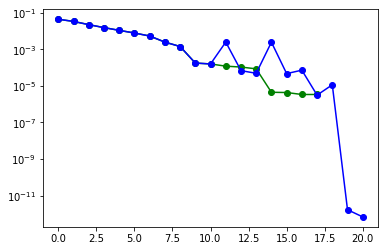

In [25]:
## 画出基于fermionic算符的Adapt-VQE方法计算H4分子的迭代曲线
x_a = np.arange(0, len(H4_f_res_a))
y_a = np.array(H4_f_res_a)
x_b = np.arange(0, len(H4_f_res_b))
y_b = np.array(H4_f_res_b)
plt.plot(x_a,y_a,'go-')
plt.plot(x_b,y_b,'bo-')
plt.yscale('log')
plt.show()

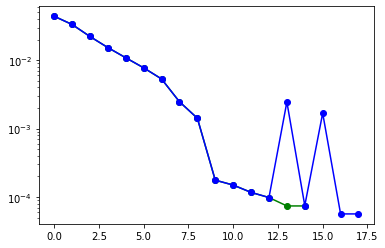

In [26]:
## 画出基于qubit算符的Adapt-VQE方法计算H4分子的迭代曲线
x_a = np.arange(0, len(H4_q_res_a))
y_a = np.array(H4_q_res_a)
x_b = np.arange(0, len(H4_q_res_b))
y_b = np.array(H4_q_res_b)
plt.plot(x_a,y_a,'go-')
plt.plot(x_b,y_b,'bo-')
plt.yscale('log')
plt.show()

In [27]:
dist = 1.6
geometry = [
    ["Li", [0.0, 0.0, 0.0 * dist]],
    ["H", [0.0, 0.0, 1.0 * dist]],
]
basis = "sto3g"
spin = 0
multiplicity = 2 * spin + 1
description = '{:.3f}'.format(dist)
LiH_molecule = MolecularData(geometry, basis, multiplicity, description=description)

In [28]:
## 使用基于fermionic算符的Adapt-VQE方法计算LiH分子体系的基态能，每一次的迭代过程中，原有的线路的初始参数来自于上一步的优化结果，新加入的线路的参数做随机初始化的处理
LiH_f_res_a = fermionic_adapt_vqe_a(LiH_molecule)

hf:-7.861864769808648.
ccsd:-7.882313821664146.
fci:-7.882324378883496.
Step   0 energy  -7.8764343058855149
Step   1 energy  -7.8783444603634738
Step   2 energy  -7.8801129920840429
Step   3 energy  -7.8802006140961280
Step   4 energy  -7.8807961383892637
Step   5 energy  -7.8812818262848419
Step   6 energy  -7.8817489934574470
Step   7 energy  -7.8817650773575423
Step   8 energy  -7.8817810450282542
Step   9 energy  -7.8818017250745944
Step  10 energy  -7.8818223965118674
Step  11 energy  -7.8818425922791855
Step  12 energy  -7.8818627829412344
Step  13 energy  -7.8818699668843371
Step  14 energy  -7.8820868601730112
Step  15 energy  -7.8822599125311887
Step  16 energy  -7.8822908413876238
Step  17 energy  -7.8822936229471399
Step  18 energy  -7.8822962630734610
Step  19 energy  -7.8823078007212146
Step  20 energy  -7.8823089758832801
Step  21 energy  -7.8823101527005681
Step  22 energy  -7.8823110220706427
Step  23 energy  -7.8823118822956397
Step  24 energy  -7.8823120656155172
Ste

In [29]:
## 使用基于fermionic算符的Adapt-VQE方法计算LiH分子体系的基态能，每一次的迭代过程中，所有的参数都做随机初始化的处理
LiH_f_res_b = fermionic_adapt_vqe_b(LiH_molecule)

hf:-7.861864769808648.
ccsd:-7.882313821664146.
fci:-7.882324378883496.
Step   0 energy  -7.8764343058855113
Step   1 energy  -7.8783444603634827
Step   2 energy  -7.8801129920840065
Step   3 energy  -7.8802006140961236
Step   4 energy  -7.8807961383895222
Step   5 energy  -7.8812818262848339
Step   6 energy  -7.8817489934574487
Step   7 energy  -7.8817650773574854
Step   8 energy  -7.8817810450278882
Step   9 energy  -7.1811646349256080
Step  10 energy  -7.7557376120951487
Step  11 energy  -7.7559097117527269
Step  12 energy  -7.7560267688510365
Step  13 energy  -7.7561186255553380
Step  14 energy  -7.7533959721760599
Step  15 energy  -7.8819717851896982
Step  16 energy  -7.7261394454145833
Step  17 energy  -7.7583643350004818
Step  18 energy  -7.8818578985858023
Step  19 energy  -7.8820539879866587
Step  20 energy  -7.8799025833357677
Step  21 energy  -7.8821463634857016
Step  22 energy  -7.8822616357027160
Step  23 energy  -7.8821840365888400
Step  24 energy  -7.8663202204306328
Ste

In [30]:
## 使用基于qubit算符的Adapt-VQE方法计算LiH分子体系的基态能，每一次的迭代过程中，原有的线路的初始参数来自于上一步的优化结果，新加入的线路的参数做随机初始化的处理
LiH_q_res_a = qubit_adapt_vqe_a(LiH_molecule)

hf:-7.861864769808648.
ccsd:-7.882313821664146.
fci:-7.882324378883496.
Step   0 energy  -7.8764343058855113
Step   1 energy  -7.8783444603634631
Step   2 energy  -7.8801129920840483
Step   3 energy  -7.8802006140961360
Step   4 energy  -7.8807961383895710
Step   5 energy  -7.8812818262849262
Step   6 energy  -7.8817489934572951
Step   7 energy  -7.8817650773575494
Step   8 energy  -7.8817810450282870
Step   9 energy  -7.8818017250745811
Step  10 energy  -7.8818223965112146
Step  11 energy  -7.8818425922791171
Step  12 energy  -7.8818627829413774
Step  13 energy  -7.8818699668848353
Step  14 energy  -7.8820630320589213
Step  15 energy  -7.8822822136047286
Step  16 energy  -7.8823002957295012
Step  17 energy  -7.8823032546451053
Step  18 energy  -7.8823062146045739
Step  19 energy  -7.8823075139879881
Step  20 energy  -7.8823088107793460
Step  21 energy  -7.8823096602494163
Step  22 energy  -7.8823103774821455
Step  23 energy  -7.8823123788896750
Step  24 energy  -7.8823125700067713
Ste

In [31]:
## 使用基于qubit算符的Adapt-VQE方法计算H4分子体系的基态能，每一次的迭代过程中，所有的参数都做随机初始化的处理
LiH_q_res_b = qubit_adapt_vqe_b(LiH_molecule)

hf:-7.861864769808648.
ccsd:-7.882313821664146.
fci:-7.882324378883496.
Step   0 energy  -7.8764343058855335
Step   1 energy  -7.8783444603634720
Step   2 energy  -7.8801129920840491
Step   3 energy  -7.8802006140961414
Step   4 energy  -7.8807961383894964
Step   5 energy  -7.8812818262849227
Step   6 energy  -7.8817489934573244
Step   7 energy  -7.8817650773575441
Step   8 energy  -7.8817810450282551
Step   9 energy  -7.8818017250745784
Step  10 energy  -7.8818223965120140
Step  11 energy  -7.8818425922794866
Step  12 energy  -7.8818627829413197
Step  13 energy  -7.8818699668848797
Step  14 energy  -7.7544447389810731
Step  15 energy  -7.7546155524594731
Step  16 energy  -7.7547154154235454
Step  17 energy  -7.8766462566075104
Step  18 energy  -7.8821387205758757
Step  19 energy  -7.8807740497950078
Step  20 energy  -7.8818715396369008
Step  21 energy  -7.8820614408026497
Step  22 energy  -7.8822232945344615
Step  23 energy  -7.8820296931935525
Step  24 energy  -7.8821456898887234
Ste

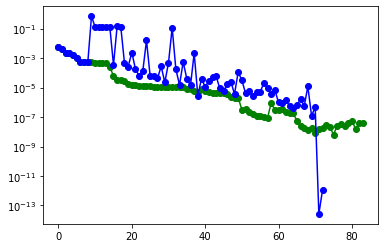

In [34]:
## 画出基于fermionic算符的Adapt-VQE方法计算LiH分子的迭代曲线
x_a = np.arange(0, len(LiH_f_res_a))
y_a = np.array(LiH_f_res_a)
x_b = np.arange(0, len(LiH_f_res_b))
y_b = np.array(LiH_f_res_b)
plt.plot(x_a,y_a,'go-')
plt.plot(x_b,y_b,'bo-')
plt.yscale('log')
plt.show()

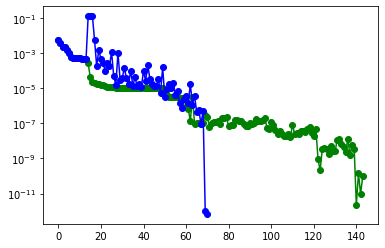

In [35]:
## 画出基于qubit算符的Adapt-VQE方法计算LiH分子的迭代曲线
x_a = np.arange(0, len(LiH_q_res_a))
y_a = np.array(LiH_q_res_a)
x_b = np.arange(0, len(LiH_q_res_b))
y_b = np.array(LiH_q_res_b)
plt.plot(x_a,y_a,'go-')
plt.plot(x_b,y_b,'bo-')
plt.yscale('log')
plt.show()

In [46]:
## 将计算结果保存至相应的文件中，并用origin画图，结果保存至 H4.jpg 和 LiH.jpg 中
with open('H4_f_res_a.txt', 'w', buffering=1) as f:
    for i,num_i in enumerate(H4_f_res_a):
        f.write("%3d\t%20.16f\n"%(i, num_i))

In [47]:
with open('H4_f_res_b.txt', 'w', buffering=1) as f:
    for i,num_i in enumerate(H4_f_res_b):
        f.write("%3d\t%20.16f\n"%(i, num_i))

In [48]:
with open('H4_q_res_a.txt', 'w', buffering=1) as f:
    for i,num_i in enumerate(H4_q_res_a):
        f.write("%3d\t%20.16f\n"%(i, num_i))

In [49]:
with open('H4_q_res_b.txt', 'w', buffering=1) as f:
    for i,num_i in enumerate(H4_q_res_b):
        f.write("%3d\t%20.16f\n"%(i, num_i))

In [50]:
with open('LiH_f_res_a.txt', 'w', buffering=1) as f:
    for i,num_i in enumerate(LiH_f_res_a):
        f.write("%3d\t%20.16f\n"%(i, num_i))

In [51]:
with open('LiH_f_res_b.txt', 'w', buffering=1) as f:
    for i,num_i in enumerate(LiH_f_res_b):
        f.write("%3d\t%20.16f\n"%(i, num_i))

In [52]:
with open('LiH_q_res_a.txt', 'w', buffering=1) as f:
    for i,num_i in enumerate(LiH_q_res_a):
        f.write("%3d\t%20.16f\n"%(i, num_i))

In [53]:
with open('LiH_q_res_b.txt', 'w', buffering=1) as f:
    for i,num_i in enumerate(LiH_q_res_b):
        f.write("%3d\t%20.16f\n"%(i, num_i))

## 项目总结

根据模拟的结果可知，对于LiH分子体系，使用基于qubit算符的Adapt-VQE方法能够以更浅的线路深度得到与fermionic-Adapt-VQE方法精度相当的结果，只是迭代过程可能会漫长一些